<h1 align="center"><front size="5">Penerapan K-Nearest Neighbor untuk Pola Penyebaran Penduduk di Kendari tahun 2015</font></h1>

### STUDY KASUS
Penyebaran penduduk merupakan suatu hal yang perlu diketahui, hal ini disebabkan karena setiap kebijakan pembangunan maupun pemanfaatan lahan disuatu daerah harus memerhatikan keadaan demografisnya, untuk masalah demografis dalam hal ini yaitu penyebaran penduduk metode yang biasa digunakan yaitu metode K-Nearest Neighbor. Sehingga masalah yang akan dibahas yaitu pola penyebaran hunian dengan menggunakan metode K-Nearest Neighbor.K-Nearest Neighbor KNN adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors). KNN dapat digunakan untuk masalah prediksi klasifikasi dan regresi. 

### TUJUAN
Tujuan kami adalah untuk mengetahui pola penyebaran hunian dengan metode K Nearest Neighbour. 

In [ ]:
# Pertama-tama mengimpor beberapa library yang dibutuhkan.
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

In [ ]:
#### Mulai dari LANGKAH 1
# Mengimpor data 

csv = "Pola_penyebaran_penduduk_Kendari_2015.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(csv)
dataset.head()

#### Pra-Prosesing 
#### Mari kita pilih beberapa fitur untuk pemodelan. karena ini merupakan syarat algoritma skitlearn:
#### Mulai dari LANGKAH 2
### seleksi data

In [ ]:
dataset = dataset[['N', 'A', 'Ju', 'Jh', 'T', 'Pola']]
dataset.head()
#menampilkan row masing-masing spesies
dataset.groupby('Pola').size() 

In [5]:
#### Mulai dari LANGKAH 3
#membuat data frame pada masing-masing spesies

mengelompok = dataset[dataset['Pola']=='Mengelompok']
acak = dataset[dataset['Pola']=='Acak']
seragam = dataset[dataset['Pola']=='Seragam']
#### Akhir dari LANGKAH 3

In [6]:
mengelompok.describe()

,N,A,Ju,Jh,T
count,1.0,1.00,1.00,1.00,1.00
mean,10.0,22.41,0.59,0.75,0.74
std,NaN,NaN,NaN,NaN,NaN
min,10.0,22.41,0.59,0.75,0.74
25%,10.0,22.41,0.59,0.75,0.74
50%,10.0,22.41,0.59,0.75,0.74
75%,10.0,22.41,0.59,0.75,0.74
max,10.0,22.41,0.59,0.75,0.74


In [7]:
acak.describe()

,N,A,Ju,Jh,T
count,8.00000,8.000000,8.000000,8.000000,8.000000
mean,16.87500,33.233750,0.706250,0.720000,1.063750
std,5.76783,17.944855,0.063457,0.071714,0.152778
min,11.00000,9.730000,0.610000,0.640000,0.870000
25%,12.50000,19.430000,0.675000,0.662500,0.985000
50%,16.00000,34.560000,0.710000,0.715000,1.055000
75%,20.25000,47.522500,0.750000,0.772500,1.142500
max,27.00000,55.510000,0.780000,0.830000,1.340000


In [8]:
seragam.describe()

,N,A,Ju,Jh,T
count,1.0,1.00,1.00,1.00,1.00
mean,11.0,7.61,0.97,0.41,1.53
std,NaN,NaN,NaN,NaN,NaN
min,11.0,7.61,0.97,0.41,1.53
25%,11.0,7.61,0.97,0.41,1.53
50%,11.0,7.61,0.97,0.41,1.53
75%,11.0,7.61,0.97,0.41,1.53
max,11.0,7.61,0.97,0.41,1.53


In [9]:
# deskripsi dataset secara kesuluruhan
dataset.describe()

,N,A,Ju,Jh,T
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,15.600000,29.589000,0.721000,0.692000,1.078000
std,5.758086,17.935108,0.110096,0.117927,0.231795
min,10.000000,7.610000,0.590000,0.410000,0.740000
25%,11.000000,15.950000,0.645000,0.647500,0.915000
50%,13.000000,22.870000,0.710000,0.715000,1.055000
75%,19.750000,46.682500,0.770000,0.765000,1.147500
max,27.000000,55.510000,0.970000,0.830000,1.530000


Menampilkan Plot Data

<Figure size 432x288 with 0 Axes>

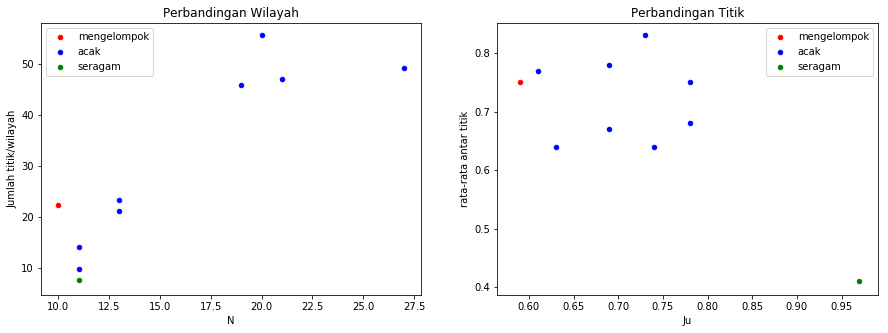

In [10]:
import matplotlib.pyplot as plt
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(15, 5))
mengelompok.plot(x="N", y="A", kind="scatter",ax=ax[0],label='mengelompok',color='r')
acak.plot(x="N",y="A",kind="scatter",ax=ax[0],label='acak',color='b')
seragam.plot(x="N", y="A", kind="scatter", ax=ax[0], label='seragam', color='g')

mengelompok.plot(x="Ju", y="Jh", kind="scatter",ax=ax[1],label='mengelompok',color='r')
acak.plot(x="Ju",y="Jh",kind="scatter",ax=ax[1],label='acak',color='b')
seragam.plot(x="Ju", y="Jh", kind="scatter", ax=ax[1], label='seragam', color='g')

ax[0].set(title='Perbandingan Wilayah', ylabel='Jumlah titik/wilayah')
ax[1].set(title='Perbandingan Titik',  ylabel='rata-rata antar titik')
ax[0].legend()
ax[1].legend()
plt.savefig('knn.png')

Langkah selanjutnya adalah memanggil data yang akan kita gunakan untuk membuat KNN. 
Misal masing-masing target/pola kita, mengelompok,  acak, seragam.
Pada output di bawah ini dapat dilihat jika kita menggunakan K=1 dan data baru a=[1.0,2.7,3.6,4.2,3.1]. 
a mewakili masing-masing nilai feature. Hasilnya adalah Seragam.


In [12]:
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 5].values
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn=KNeighborsClassifier(n_neighbors=1) #define K=1
knn.fit(x,y)
a=np.array([[1.0,2.7,3.6,4.2,3.1]])
knn.predict(a)

array(['Seragam'], dtype=object)

Jika saya ganti nilai k=3 dengan nilai data a berubah, maka hasil menjadi Acak.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
knn=KNeighborsClassifier(n_neighbors=5) #define K=3
knn.fit(x,y)
a=np.array([[1.0,2.7,3.6,4.2,2]])
knn.predict(a)

array(['Acak'], dtype=object)

Untuk menghindari overfitting, kita dapat membagi pola dataset tadi menjadi data train dan test. Perbandingannya 80%:20%, sehingga bakal ada x  buat training dan testing, begitu juga dengan y bakal ada y buat training dan  testing. 

In [16]:
from sklearn.model_selection import train_test_split   
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [17]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [18]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
y_pred

array(['Acak', 'Acak'], dtype=object)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[2]]
              precision    recall  f1-score   support

        Acak       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Menentukan nilai K
Nah sekarang kita akan mencari tahu nilai K berapa yang akan menghasilkan akurasi tinggi. 
Karena kita tahu sendiri pada algoritma KNN, penentuan nilai K sangatlah krusial. 
Kita akan melihat nilai K dari 1–9. Berikut code yang dapat kita gunakan:

In [15]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 9):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rata-rata')

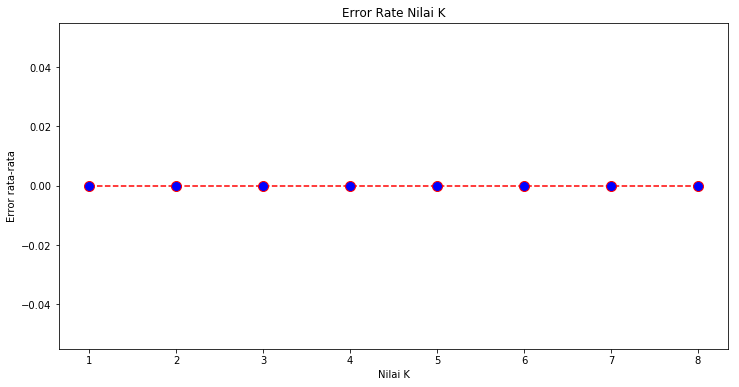

In [16]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 9), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')

Dari hasil di atas kita dapat melihat bahwa yang memiliki nilai error rata-rata 0 adalah ketika nilai K sebesar 1-8. 
Hasil ini dapat dijadikan pedoman ketika kita ingin menggunakan nilai K yang memiliki akurasi tinggi. 
Dari situ  kita dapat meminimalisir kesalahan prediksi.
Kita juga dapat membuat code menjadi dinamis, sehingga memungkinkan    
adanya interaksi ketika kita memasukkan data. Dengan menambahkan                  
beberapa perintah logika kita dapat melakukan hal tersebut.


In [ ]:
## import numpy as np
from sklearn import neighbors, datasets
from sklearn import preprocessing 
 
n_neighbors = 10
 
# prepare data
#X = dataset.iloc[:, :-1].values  
#y = dataset.iloc[:, 4].values
h = .02 
 
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(x, y)
 
# make prediction
n = input('Jumlah Titik: ')
a = input('Jumlah Luas: ')
ju = input('Jarak Rata-rata antar Titik Tetangga: ')
jh = input('Jarak Rata-rata antar Titik Wilayah: ')
t = input('Hasil Perhitungan: ')
dataClass = clf.predict([[n,a,ju,jh,t]])
print('Prediction: '),
 
if dataClass == 'Mengelompok':
    print('Mengelompok')
elif dataClass == 'Acak':
    print('Acak')
else:
    print('Seragam')